In [49]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [72]:
df= pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [71]:
h=df[df.left==1]
h.shape

(3571, 10)

In [73]:
h=df[df.left==0]
h.shape

(11428, 10)

In [112]:
df.groupby('left').describe()

satisfaction_level                                                    \
                  count      mean       std   min   25%   50%   75%   max   
left                                                                        
0               11428.0  0.666810  0.217104  0.12  0.54  0.69  0.84  1.00   
1                3571.0  0.440098  0.263933  0.09  0.13  0.41  0.73  0.92   

     last_evaluation            ... Work_accident      promotion_last_5years  \
               count      mean  ...           75%  max                 count   
left                            ...                                            
0            11428.0  0.715473  ...           0.0  1.0               11428.0   
1             3571.0  0.718113  ...           0.0  1.0                3571.0   

                                                   
          mean       std  min  25%  50%  75%  max  
left                                               
0     0.026251  0.159889  0.0  0.0  0.0  0.0  1.0  
1     0.005321  0.072759  0.0  0.0  0.0  0.0  1.0  

[2 rows x 56 columns]

<Axes: xlabel='salary'>

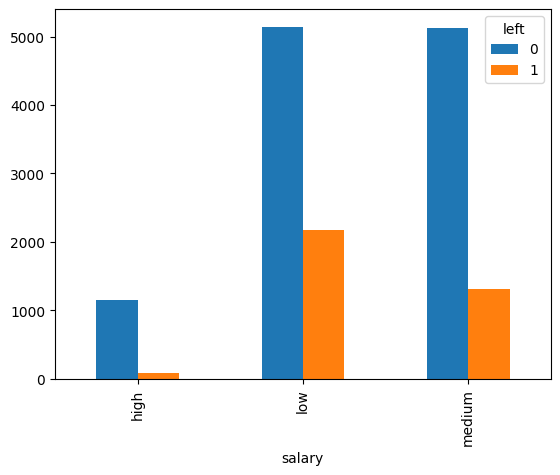

In [114]:
pd.crosstab(df.salary,df.left).plot(kind="bar")

<Axes: xlabel='promotion_last_5years'>

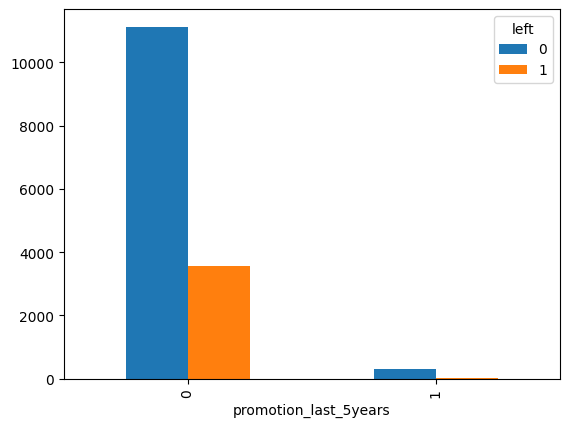

In [117]:
pd.crosstab(df.promotion_last_5years,df.left).plot(kind="bar")

In [122]:
""" 
Satisfaction Level
Average Monthly Hours
Promotion Last 5 Years
Salary
"""

' \nSatisfaction Level\nAverage Monthly Hours\nPromotion Last 5 Years\nSalary\n'

In [127]:
newdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
newdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [128]:
y=df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [129]:
dummies=pd.get_dummies(newdf.salary)
dummies

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [131]:
merge=pd.concat([newdf,dummies] ,axis="columns")
merge

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


In [132]:
merge=merge.drop('salary',axis="columns")
merge

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,False,True,False
14995,0.37,160,0,False,True,False
14996,0.37,143,0,False,True,False
14997,0.11,280,0,False,True,False


In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merge,y,train_size=0.3)

In [146]:
model=linear_model.LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Admin\pythonlab\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [148]:
model.score(X_train,y_train)

0.7857301622582796

In [149]:
model.score(X_test,y_test)

0.7752380952380953